In [2]:
from util_raster import get_raster_path, get_shadow_image
from surfaces import Surfaces
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
# from tqdm.notebook import trange, tqdm

%load_ext autoreload
%autoreload 2


c:\Users\guest_research\Documents\kazi\deep-umbra\util_raster.py:8: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [11]:
if not os.path.exists('./data/metrics/'):
    os.makedirs('./data/metrics/')

-97.87914529999999 30.179010799999986 -97.606218 30.390168999999993 16 ./data/shadows_new/aus-winter/ None (0.0, 1.0)


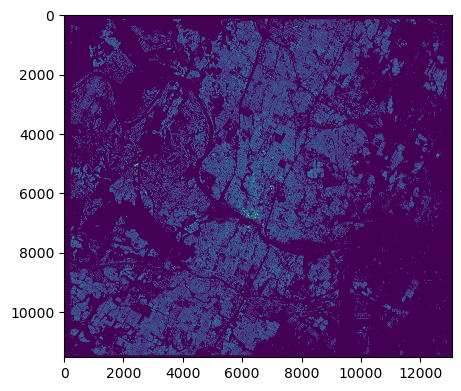

In [12]:
import cv2
import matplotlib.pyplot as plt

# arr = get_shadow_image(*[40.7386519312932, -74.01222185978449][::-1], *[40.760217630179155, -
#                        73.95257387648877][::-1], 16, './data/shadows_new/nyc-summer/')

# arr for aus-winter: (30.179010799999986, -97.87914529999999)	(30.390168999999993, -97.606218)
arr = get_shadow_image(*[30.179010799999986, -97.87914529999999][::-1], *[30.390168999999993, -
                       97.606218][::-1], 16, './data/shadows_new/aus-winter/')

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.imshow(arr)
plt.show()

In [39]:
stats

min       max      mean  count         sum    median  nodata   
id                                                                              
1881386     0.000000  0.000000  0.000000    132    0.000000  0.000000       0  \
1881388     0.000000  0.000000  0.000000    151    0.000000  0.000000       0   
1881389     0.000000  0.000000  0.000000    121    0.000000  0.000000       0   
1884057     0.709804  1.000000  0.923332    109  100.643137  0.976471       0   
1954876     0.000000  0.000000  0.000000     19    0.000000  0.000000       0   
...              ...       ...       ...    ...         ...       ...     ...   
1058425404  0.000000  1.000000  0.619739     30   18.592157  0.962745       0   
1059352044  0.000000  0.117647  0.011242     30    0.337255  0.000000       0   
1059546533  0.000000  0.000000  0.000000     36    0.000000  0.000000       0   
1059546534  0.000000  0.000000  0.000000     64    0.000000  0.000000       0   
1059715667  0.000000  0.000000  0.000000     97    0.000000  0.000000       0   

                  area              name   
id                                         
1881386     509.237193        Anglo Road  \
1881388     601.184523       Loch Street   
1881389     483.587420    Evaline Street   
1884057     422.989514       Park Street   
1954876      74.918338  Cleveland Street   
...                ...               ...   
1058425404  118.146893              <NA>   
1059352044  121.319954              <NA>   
1059546533  143.423822        Ferns Lane   
1059546534  248.727435       Coogan Lane   
1059715667  379.688744              <NA>   

                                                     geometry  
id                                                             
1881386     MULTILINESTRING ((151.09789 -33.91319, 151.099...  
1881388     MULTILINESTRING ((151.09770 -33.91285, 151.097...  
1881389     MULTILINESTRING ((151.09782 -33.91558, 151.097...  
1884057     MULTILINESTRING ((151.20813 -33.87312, 151.208...  
1954876     MULTILINESTRING ((151.19310 -33.88761, 151.193...  
...                                                       ...  
1058425404  MULTILINESTRING ((151.24886 -33.89103, 151.248...  
1059352044  MULTILINESTRING ((151.24244 -33.98388, 151.242...  
1059546533  MULTILINESTRING ((151.12978 -33.86414, 151.129...  
1059546534  MULTILINESTRING ((151.12932 -33.86573, 151.129...  
1059715667  MULTILINESTRING ((151.21546 -33.94307, 151.215...  

[27018 rows x 10 columns]

In [22]:
import multiprocessing
print(multiprocessing.cpu_count())

24


In [2]:
stats = Surfaces.networks.driving.rasterstats_from_file(
    './data/osm/bue.osm.pbf', './data/shadows/bue-summer/', 16, [0.0, 1.0])


In [23]:
train_cities = ['aus', 'par', 'syd', 'sp', 'mex', 'la', 'chi']
seasons = ['summer', 'spring', 'winter']

In [24]:
for city in train_cities:
    for season in seasons:
        stats_gt = Surfaces.networks.driving.rasterstats_from_file(
            './data/osm/%s.osm.pbf'%(city), './data/shadows/%s-%s/'%(city, season), 16, [0.0, 1.0])

        stats_pred = Surfaces.networks.driving.rasterstats_from_file(
            './data/osm/%s.osm.pbf'%(city), './data/shadows_new/%s-%s/'%(city, season), 16, [0.0, 1.0])
        
        # save stats_gt and stats_pred as csv files
        stats_gt.to_csv('./data/shadows/%s-%s.csv'%(city, season))
        stats_pred.to_csv('./data/shadows_new/%s-%s.csv'%(city, season))

        # stats_gt = pd.read_csv('./data/shadows/%s-%s.csv'%(city, season))
        # stats_pred = pd.read_csv('./data/shadows_new/%s-%s.csv'%(city, season))
        
        # mse = ((stats_gt['mean'] - stats_pred['mean']) ** 2).mean()
        # rmse = np.sqrt(mse)

        # print(city, season, rmse)


        # stats_gt['weighted'] = (pd.Series.astype(stats_gt['sum'], float)
        #     / (stats_gt['count'] + stats_gt['nodata'])
        # ).astype(float)

        # stats_pred['weighted'] = (pd.Series.astype(stats_pred['sum'], float)
        #     / (stats_pred['count'] + stats_pred['nodata'])
        # ).astype(float)

        # _mean = abs(stats_pred['mean'] - stats_gt['mean']).mean()
        # _weighted_mean = abs(stats_pred['weighted'] - stats_gt['weighted']).mean()

        # save as a csv file. format: city, season, mean, weighted_mean
        # with open('./data/urban-metrics.csv', 'a') as f:
        #     f.write('%s,%s,%f\n'%(city, season, _mean 
        #                             #  _weighted_mean
        #                              ))

-97.90726988813678 30.16751366351983 -97.59028309491822 30.408523034992974 16 ./data/shadows/aus-summer/ None [0.0, 1.0]


c:\Users\guest_research\Documents\kazi\deep-umbra\envs\lib\site-packages\rasterio\features.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _rasterize(valid_shapes, out, transform, all_touched, merge_alg)
c:\Users\guest_research\Documents\kazi\deep-umbra\envs\lib\site-packages\rasterio\features.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _rasterize(valid_shapes, out, transform, all_touched, merge_alg)


-97.90726988813678 30.16751366351983 -97.59028309491822 30.408523034992974 16 ./data/shadows_new/aus-summer/ None [0.0, 1.0]
-97.90726988813678 30.16751366351983 -97.59028309491822 30.408523034992974 16 ./data/shadows/aus-spring/ None [0.0, 1.0]
-97.90726988813678 30.16751366351983 -97.59028309491822 30.408523034992974 16 ./data/shadows_new/aus-spring/ None [0.0, 1.0]
-97.90726988813678 30.16751366351983 -97.59028309491822 30.408523034992974 16 ./data/shadows/aus-winter/ None [0.0, 1.0]


c:\Users\guest_research\Documents\kazi\deep-umbra\envs\lib\site-packages\rasterio\features.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _rasterize(valid_shapes, out, transform, all_touched, merge_alg)


-97.90726988813678 30.16751366351983 -97.59028309491822 30.408523034992974 16 ./data/shadows_new/aus-winter/ None [0.0, 1.0]
2.219608969940409 48.80831772098406 2.4808416403959526 48.909582771904496 16 ./data/shadows/par-summer/ None [0.0, 1.0]
2.219608969940409 48.80831772098406 2.4808416403959526 48.909582771904496 16 ./data/shadows_new/par-summer/ None [0.0, 1.0]
2.219608969940409 48.80831772098406 2.4808416403959526 48.909582771904496 16 ./data/shadows/par-spring/ None [0.0, 1.0]


c:\Users\guest_research\Documents\kazi\deep-umbra\envs\lib\site-packages\rasterio\features.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _rasterize(valid_shapes, out, transform, all_touched, merge_alg)
c:\Users\guest_research\Documents\kazi\deep-umbra\envs\lib\site-packages\rasterio\features.py:366: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _rasterize(valid_shapes, out, transform, all_touched, merge_alg)


2.219608969940409 48.80831772098406 2.4808416403959526 48.909582771904496 16 ./data/shadows_new/par-spring/ None [0.0, 1.0]
2.219608969940409 48.80831772098406 2.4808416403959526 48.909582771904496 16 ./data/shadows/par-winter/ None [0.0, 1.0]
2.219608969940409 48.80831772098406 2.4808416403959526 48.909582771904496 16 ./data/shadows_new/par-winter/ None [0.0, 1.0]
151.08734907097818 -34.00599092953371 151.28688441248397 -33.8258964727535 16 ./data/shadows/syd-summer/ None [0.0, 1.0]
151.08734907097818 -34.00599092953371 151.28688441248397 -33.8258964727535 16 ./data/shadows_new/syd-summer/ None [0.0, 1.0]
151.08734907097818 -34.00599092953371 151.28688441248397 -33.8258964727535 16 ./data/shadows/syd-spring/ None [0.0, 1.0]
151.08734907097818 -34.00599092953371 151.28688441248397 -33.8258964727535 16 ./data/shadows_new/syd-spring/ None [0.0, 1.0]
151.08734907097818 -34.00599092953371 151.28688441248397 -33.8258964727535 16 ./data/shadows/syd-winter/ None [0.0, 1.0]
151.08734907097818 

In [5]:
# nyc-winter

nyc_winter_gt = pd.read_csv('./data/shadows/nyc-winter.csv')
nyc_winter_pred = pd.read_csv('./data/shadows_new/nyc-winter.csv')

In [16]:
nyc_winter_gt['geometry']

0         MULTILINESTRING ((-73.9892336 40.6909821, -73....
1         MULTILINESTRING ((-73.9604229 40.7982075, -73....
2         MULTILINESTRING ((-73.9820041 40.7855915, -73....
3         MULTILINESTRING ((-73.9314426 40.8590785, -73....
4         MULTILINESTRING ((-73.9810702 40.788486, -73.9...
                                ...                        
171000    MULTILINESTRING ((-73.9952445 40.7570939, -73....
171001    MULTILINESTRING ((-73.949647 40.678963, -73.94...
171002    MULTILINESTRING ((-73.890116 40.6900593, -73.8...
171003    MULTILINESTRING ((-73.8420903 40.729808, -73.8...
171004    MULTILINESTRING ((-73.8467973 40.7239178, -73....
Name: geometry, Length: 171005, dtype: object

In [18]:
# abs(nyc_winter_gt['mean'] - nyc_winter_pred['mean']).mean()

import geopandas as gpd
from shapely import wkt

# convert to gdf and plot
nyc_winter_gt_gdf = gpd.GeoDataFrame(nyc_winter_gt, crs='EPSG:4326', geometry=nyc_winter_gt['geometry'].apply(wkt.loads))



<Axes: >

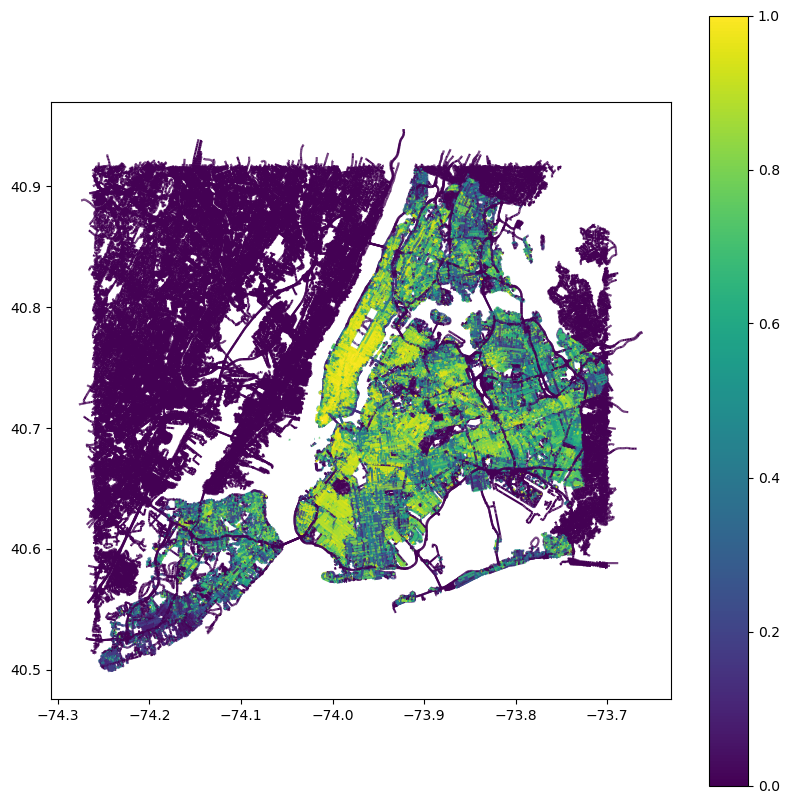

In [20]:
nyc_winter_gt_gdf.plot(column='mean', legend=True, figsize=(10, 10))

In [11]:
_mean = abs(stats_pred['mean'] - stats_gt['mean']).mean()
# _weighted_mean = abs(stats_pred['weighted'] - stats_gt['weighted']).mean()

# save as a csv file. format: city, season, mean, weighted_mean
with open('./data/urban-metrics.csv', 'a') as f:
    f.write('%s,%s,%f\n'%(city, season, _mean 
                            #  _weighted_mean
                                ))

In [82]:
# filtered

In [8]:
filtered = stats[~stats['sum'].isnull()]
filtered['weighted'] = filtered['sum'] / (filtered['area'])
filtered['weighted'] = filtered['weighted'].astype(float)


<Axes: >

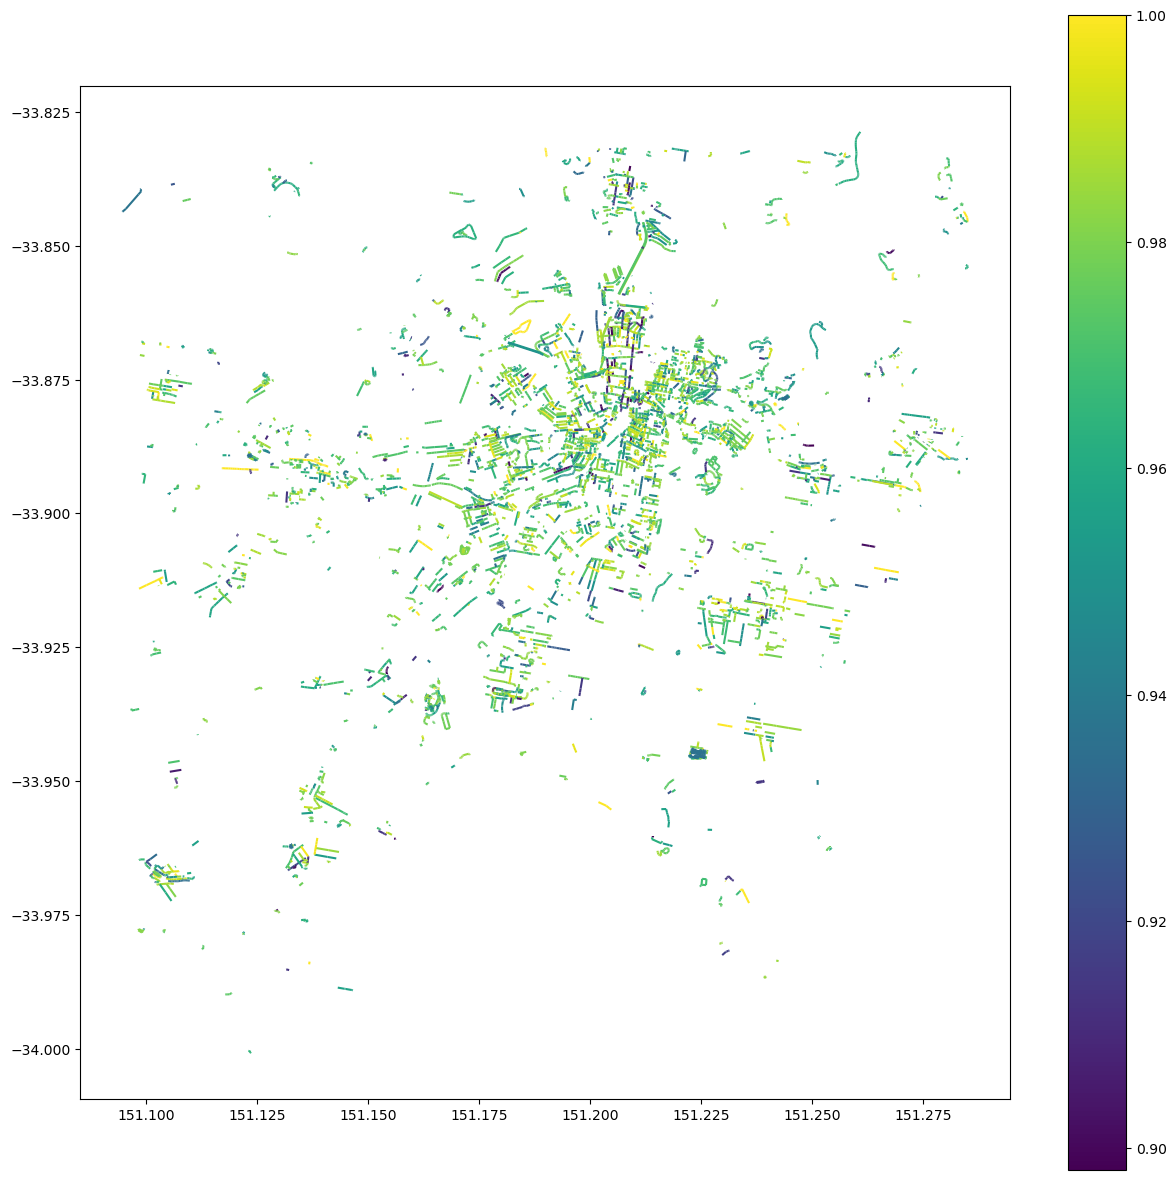

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
filtered.cx[-74.01222185978449:-73.95257387648877,
            40.7386519312932:40.760217630179155].plot(column='mean', ax=ax, legend=True)


-74.01222185978449 40.7386519312932 -73.95257387648877 40.760217630179156 16 ./data/shadows/nyc-winter/ None (0.0, 1.0)


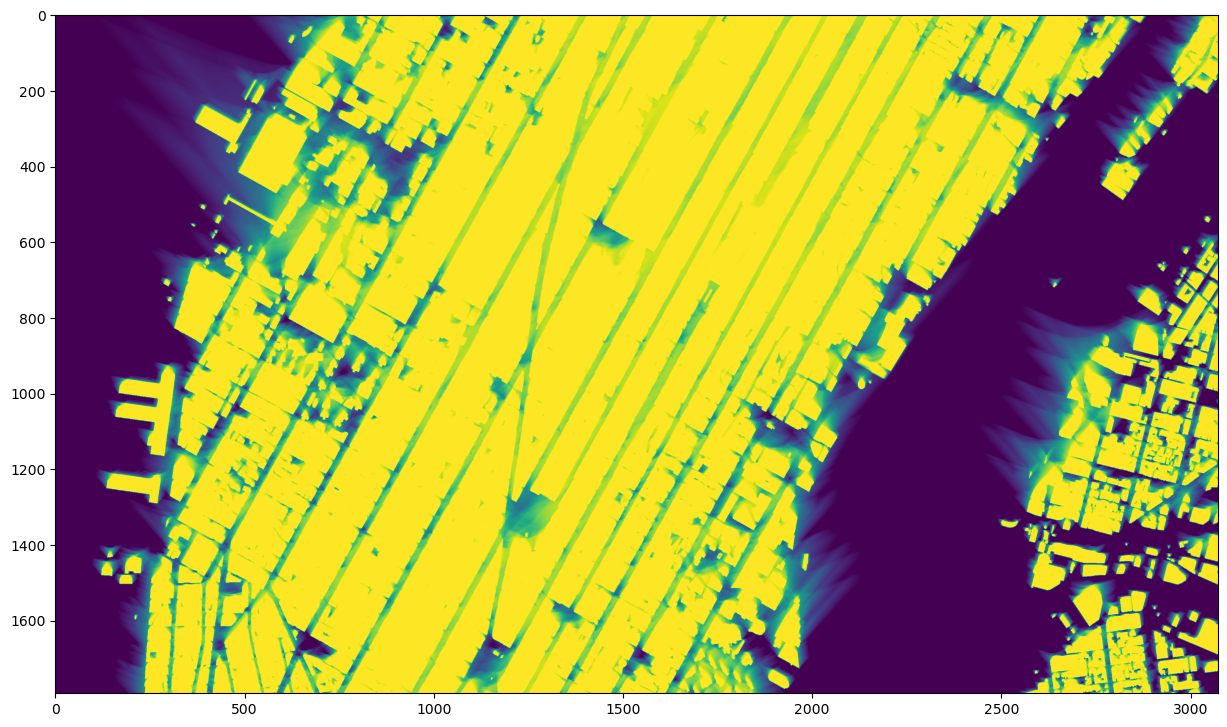

In [58]:
import cv2
import matplotlib.pyplot as plt

arr = get_shadow_image(*[40.7386519312932, -74.01222185978449][::-1], *[40.760217630179155, -
                       73.95257387648877][::-1], 16, './data/shadows/nyc-winter/')
fig, ax = plt.subplots(1, 1, figsize=(15, 15))


ax.imshow(arr)
plt.show()


In [17]:
arr


array([[  0,   0,   0, ..., 244, 238, 233],
       [  0,   0,   0, ..., 248, 242, 238],
       [  0,   0,   0, ..., 254, 247, 242],
       ...,
       [  0,   0,   0, ...,  12,  12,  12],
       [  0,   0,   0, ...,  14,  18,  19],
       [  0,   0,   0, ...,  20,  19,  21]], dtype=int16)

In [27]:
stats

min       max      mean  count         sum    median  nodata   
id                                                                              
5029221     0.207843  0.549020  0.407235    116   47.239216  0.429412       0  \
5668966     0.752941  1.000000  0.977463     83   81.129412  1.000000       0   
5668968     0.098039  1.000000  0.823473    831  684.305882  0.988235       0   
5668973     0.000000  1.000000  0.706552    867  612.580392  0.988235       0   
5668977     0.160784  1.000000  0.795944    935  744.207843  0.980392       0   
...              ...       ...       ...    ...         ...       ...     ...   
1053371047  0.090196  0.117647  0.106256     21    2.231373  0.105882       0   
1053376772  0.035294  0.498039  0.330234     62   20.474510  0.360784       0   
1053381025  0.000000  0.000000  0.000000     27    0.000000  0.000000       0   
1053425614  0.000000  0.000000  0.000000    114    0.000000  0.000000       0   
1053425616  0.384314  0.564706  0.457209     17    7.772549  0.447059       0   

                   area                     name   
id                                                 
5029221      378.678503             Boerum Place  \
5668966      275.939585        West 106th Street   
5668968     2714.050675         West 80th Street   
5668973     2839.313306          Hillside Avenue   
5668977     3063.910192         West 84th Street   
...                 ...                      ...   
1053371047    69.861428                     <NA>   
1053376772   196.556747          Nostrand Avenue   
1053381025    91.668779  Jackie Robinson Parkway   
1053425614   375.700034                     <NA>   
1053425616    57.695844                     <NA>   

                                                     geometry  
id                                                             
5029221     MULTILINESTRING ((-73.98923 40.69098, -73.9891...  
5668966     MULTILINESTRING ((-73.96042 40.79821, -73.9607...  
5668968     MULTILINESTRING ((-73.98200 40.78559, -73.9808...  
5668973     MULTILINESTRING ((-73.93144 40.85908, -73.9312...  
5668977     MULTILINESTRING ((-73.98107 40.78849, -73.9810...  
...                                                       ...  
1053371047  MULTILINESTRING ((-73.99524 40.75709, -73.9951...  
1053376772  MULTILINESTRING ((-73.94965 40.67896, -73.9496...  
1053381025  MULTILINESTRING ((-73.89012 40.69006, -73.8902...  
1053425614  MULTILINESTRING ((-73.84209 40.72981, -73.8421...  
1053425616  MULTILINESTRING ((-73.84680 40.72392, -73.8467...  

[171005 rows x 10 columns]

In [19]:
# stats = Surfaces.parks.rasterstats_from_file('./data/osm/nyc.osm.pbf', './data/shadows/nyc-summer/', 16, [0.0, 1.0])
stats = Surfaces.networks.driving.rasterstats_from_file(
    './data/osm/nyc.osm.pbf', './data/shadows/nyc-summer/', 16, [0.0, 1.0])


-74.27695907318935 40.498350694678976 -73.66143000364853 40.947436214241414 16 ./data/shadows/nyc-summer/ None [0.0, 1.0]


In [4]:
from joblib import Parallel, delayed

cities = ['sp', 'nyc', 'chi', 'lon', 'tok']
dates = ['summer', 'spring', 'winter']
ranges = [[0, 0.25], [0, 1], [0.25, 1], [0.5, 1], [0.75, 1]]
zoom = 16

if not os.path.exists('./data/tiff/'):
    os.makedirs('./data/tiff/')


def run(city, date, rrange):
    filename = 'streets_%s-%s_%s-%s' % (city, date, str(
        rrange[0]).replace('.', ''), str(rrange[1]).replace('.', ''))

    print(filename)
    if os.path.exists('./data/metrics/'+filename+'.feather'):
        return True

    stats = Surfaces.networks.driving.rasterstats_from_file(
        './data/osm/%s.osm.pbf' % city, './data/shadows_new/%s-%s/' % (city, date), zoom, rrange, './data/tiff/'+filename+'.tiff')

    outfilename = './data/metrics/'+filename+'.feather'
    stats.to_feather(outfilename)

    os.remove('./data/tiff/'+filename+'.tiff')

    return True


Parallel(n_jobs=4)(delayed(run)(city, date, rrange)
                   for rrange in ranges for city in cities for date in dates)


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [6]:
from joblib import Parallel, delayed

cities = set()
dates = ['summer', 'spring', 'winter']
ranges = [[0, 0.25], [0, 1], [0.25, 1], [0.5, 1], [0.75, 1]]
zoom = 16

folders = glob.glob('./data/shadows_new/*-*/')

for folder in folders:
    tks = os.path.normpath(folder).split(os.path.sep)
    city, date = tks[-1].split('-')
    cities.add(city)
cities = sorted(list(cities))


def run(city, date, rrange):
    filename = 'parks_%s-%s_%s-%s' % (city, date, str(
        rrange[0]).replace('.', ''), str(rrange[1]).replace('.', ''))

    print(filename)
    if os.path.exists('./data/metrics/'+filename+'.feather'):
        return True

    stats = Surfaces.parks.rasterstats_from_file(
        './data/osm/%s.osm.pbf' % city, './data/shadows_new/%s-%s/' % (city, date), zoom, rrange, './data/tiff/'+filename+'.tiff')

    outfilename = './data/metrics/'+filename+'.feather'
    stats.to_feather(outfilename)

    os.remove('./data/tiff/'+filename+'.tiff')

    return True


for date in dates:
    for rrange in ranges:
        for city in cities:
            run(city, date, rrange)

# aux = [(city, date, rrange) for rrange in ranges for date in dates for city in cities]

# Parallel(n_jobs=2)(delayed(run)(city, date, rrange) for rrange in ranges for date in dates for city in cities)


parks_abu-summer_0-025
parks_ams-summer_0-025
parks_ant-summer_0-025
parks_aur-summer_0-025
parks_aus-summer_0-025
parks_bar-summer_0-025
parks_bei-summer_0-025
parks_ber-summer_0-025
parks_bir-summer_0-025
parks_bos-summer_0-025
parks_bri-summer_0-025
parks_bud-summer_0-025
parks_bue-summer_0-025
parks_cap-summer_0-025
parks_chi-summer_0-025
parks_cle-summer_0-025
parks_cls-summer_0-025
parks_cnc-summer_0-025
parks_col-summer_0-025
parks_cop-summer_0-025
parks_crl-summer_0-025
parks_cur-summer_0-025
parks_dal-summer_0-025
parks_dba-summer_0-025
parks_dbl-summer_0-025
parks_dc-summer_0-025
parks_dep-summer_0-025
parks_det-summer_0-025
parks_dha-summer_0-025
parks_dmo-summer_0-025
parks_edi-summer_0-025
parks_far-summer_0-025
parks_fra-summer_0-025
parks_fwa-summer_0-025
parks_fwo-summer_0-025
parks_ham-summer_0-025
parks_hav-summer_0-025
parks_hir-summer_0-025
parks_hou-summer_0-025
parks_ind-summer_0-025
parks_jac-summer_0-025
parks_joh-summer_0-025
parks_jvi-summer_0-025
parks_kie-su

parks_sea-winter_05-1
parks_sio-winter_05-1
parks_sjo-winter_05-1
parks_sof-winter_05-1
parks_sp-winter_05-1
parks_spa-winter_05-1
parks_sti-winter_05-1
parks_stl-winter_05-1
parks_stp-winter_05-1
parks_syd-winter_05-1
parks_tai-winter_05-1
parks_tal-winter_05-1
parks_tam-winter_05-1
parks_tav-winter_05-1
parks_the-winter_05-1
parks_tij-winter_05-1
parks_tok-winter_05-1
parks_tol-winter_05-1
parks_tor-winter_05-1
parks_tou-winter_05-1
parks_tri-winter_05-1
parks_tul-winter_05-1
parks_utr-winter_05-1
parks_van-winter_05-1
parks_veg-winter_05-1
parks_ven-winter_05-1
parks_vie-winter_05-1
parks_vir-winter_05-1
parks_wil-winter_05-1
parks_abu-winter_075-1
parks_ams-winter_075-1
parks_ant-winter_075-1
parks_aur-winter_075-1
parks_aus-winter_075-1
parks_bar-winter_075-1
parks_bei-winter_075-1
parks_ber-winter_075-1
parks_bir-winter_075-1
parks_bos-winter_075-1
parks_bri-winter_075-1
parks_bud-winter_075-1
parks_bue-winter_075-1
parks_cap-winter_075-1
parks_chi-winter_075-1
parks_cle-winter_0

In [11]:
import geopandas as gpd
df = gpd.read_feather('data/osm/nyc.feather')
print(df.total_bounds)


[-8266847.34333423  4910884.06506    -8203906.00080167  4972595.30066503]


In [12]:
import geopandas as gpd
df = gpd.read_feather('data/osm/ams.feather')
print(df.total_bounds)


[ 526305.71733331 6816581.19155798  565413.8908455  6844663.00801326]


array([-8266847.34333423,  4910884.06506   , -8203906.00080167,
        4972595.30066503])

<AxesSubplot:>

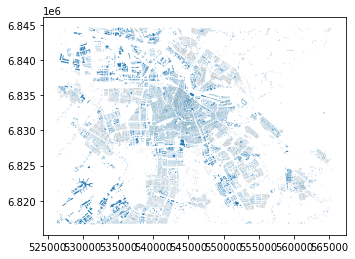

In [10]:
df.plot()


In [20]:
stats


min       max      mean           sum    median  nodata  \
222271      0.0  0.000000  0.000000      0.000000  0.000000       0   
270456      0.0  0.000000  0.000000      0.000000  0.000000       0   
916630      0.0  1.000000  0.001610    211.047059  0.000000       0   
1751075     0.0  1.000000  0.536522   1574.156863  0.472549       0   
2389631     0.0  1.000000  0.143213  30741.631373  0.000000       0   
...         ...       ...       ...           ...       ...     ...   
1053399165  0.0  0.192157  0.099660      7.474510  0.101961       0   
1053399166  0.0  0.137255  0.009278      3.219608  0.000000       0   
1053399167  0.0  1.000000  0.155138     52.901961  0.031373       0   
1053399168  0.0  1.000000  0.418558    100.035294  0.231373       0   
1053399169  0.0  1.000000  0.192624     53.356863  0.023529       0   

                    area                     name  \
222271      7.225507e+04            Yantacaw Park   
270456      1.823411e+06    Tenafly Nature Center   
916630      4.259991e+05  FDR boardwalk and beach   
1751075     9.506859e+03            John Jay Park   
2389631     6.962276e+05         Governors Island   
...                  ...                      ...   
1053399165  2.474758e+02                     <NA>   
1053399166  1.139148e+03                     <NA>   
1053399167  1.104448e+03                     <NA>   
1053399168  7.827936e+02                     <NA>   
1053399169  8.935814e+02                     <NA>   

                                                     geometry  
222271      MULTIPOLYGON (((-74.15962 40.81410, -74.15906 ...  
270456      MULTIPOLYGON (((-73.95077 40.92315, -73.95036 ...  
916630      MULTIPOLYGON (((-74.09278 40.56781, -74.09273 ...  
1751075     MULTIPOLYGON (((-73.95027 40.76887, -73.94941 ...  
2389631     MULTIPOLYGON (((-74.02658 40.68574, -74.02657 ...  
...                                                       ...  
1053399165  MULTIPOLYGON (((-74.10549 40.62053, -74.10548 ...  
1053399166  MULTIPOLYGON (((-74.10508 40.62072, -74.10506 ...  
1053399167  MULTIPOLYGON (((-74.10357 40.62123, -74.10355 ...  
1053399168  MULTIPOLYGON (((-74.10489 40.61963, -74.10487 ...  
1053399169  MULTIPOLYGON (((-74.10494 40.61996, -74.10489 ...  

[6240 rows x 9 columns]

In [31]:
stats[stats['name'].str.contains('Central Park')]


min       max      mean            sum    median  nodata  \
225188063  0.188235  1.000000  0.610751     345.074510  0.470588       0   
427818536  0.000000  1.000000  0.096406  101486.258824  0.000000       0   
585788256  0.000000  0.015686  0.004082       0.498039  0.000000       0   

                   area                                    name  \
225188063  1.828744e+03  Central Park East Community Playground   
427818536  3.409748e+06                            Central Park   
585788256  3.990042e+02                   Central Park Carousel   

                                                    geometry  
225188063  MULTIPOLYGON (((-73.94855 40.79337, -73.94851 ...  
427818536  MULTIPOLYGON (((-73.98141 40.76846, -73.98135 ...  
585788256  MULTIPOLYGON (((-73.97538 40.76998, -73.97537 ...

<Axes: >

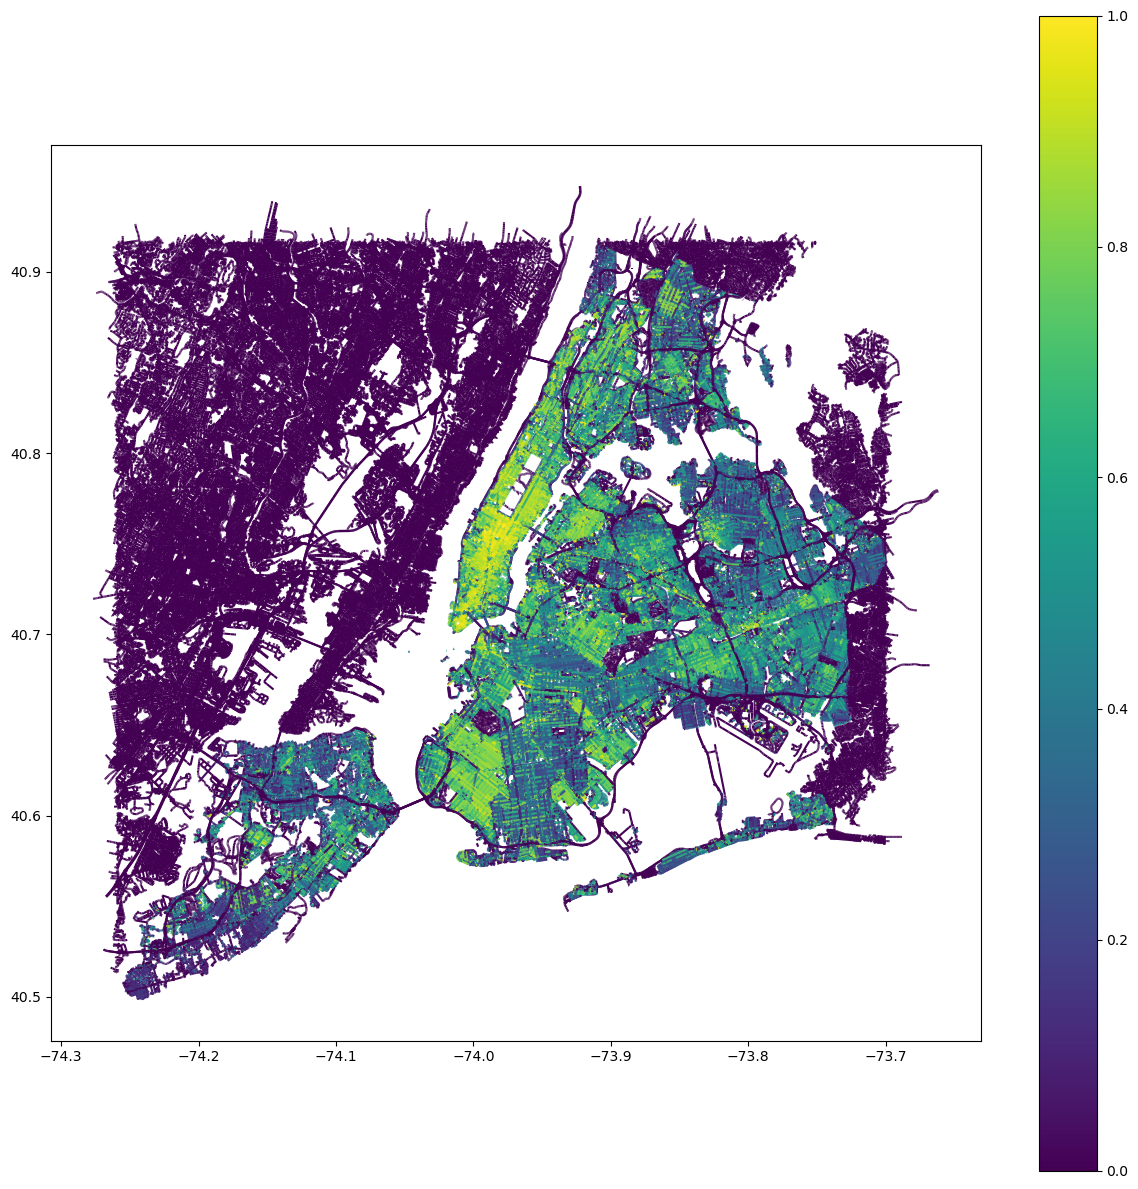

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
stats.plot(column='mean', ax=ax, legend=True)


<AxesSubplot:>

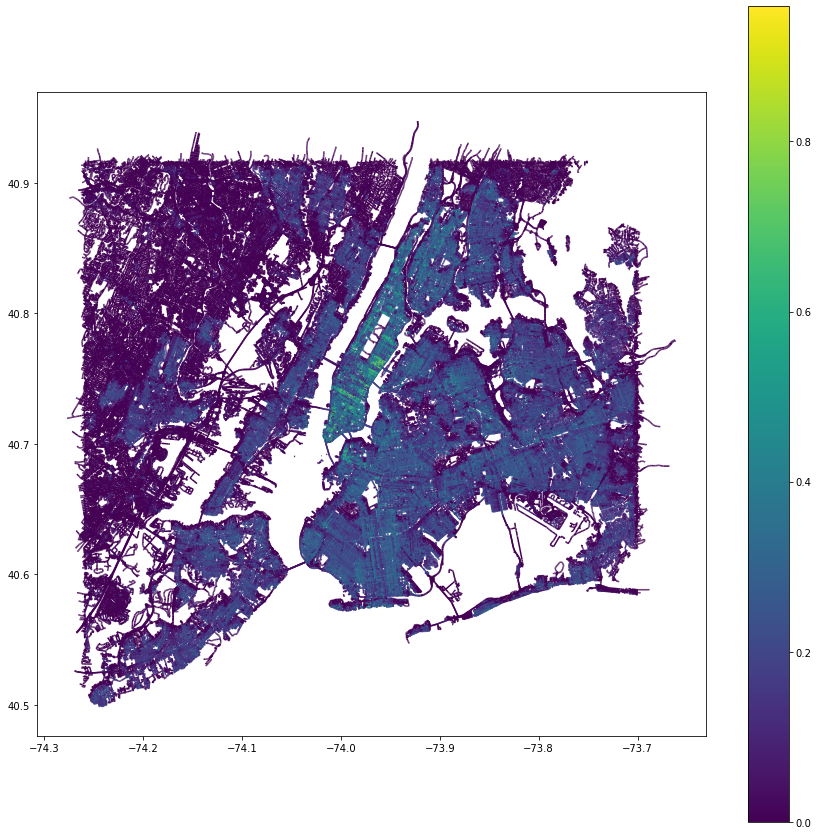

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
stats.plot(column='mean', ax=ax, legend=True)


<AxesSubplot:>

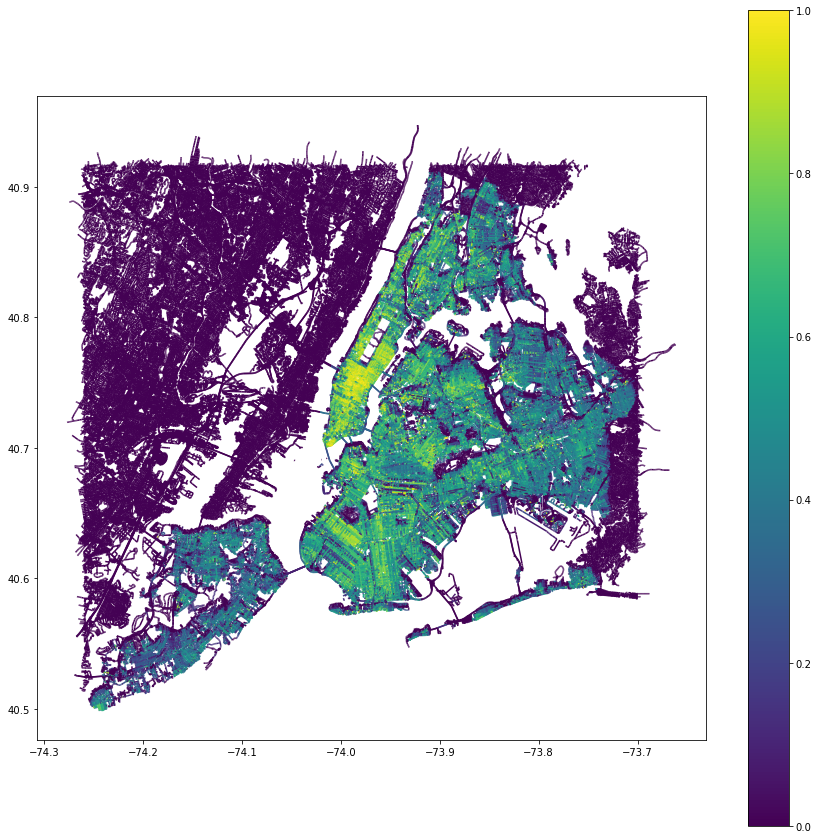

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
stats.plot(column='mean', ax=ax, legend=True)


In [9]:
path = get_raster_path(*[40.6986519312932, -74.04222185978449][::-1], *[
                       40.800217630179155, -73.92257387648877][::-1], 16, './data/shadows/nyc-spring/')


./data/shadows/nyc-spring/16/[0-9]*/[0-9]*.png


In [24]:
arr = get_shadow_image(*[40.6986519312932, -74.04222185978449][::-1], *[
                       40.800217630179155, -73.92257387648877][::-1], 16, './data/shadows/nyc-spring/')


In [59]:
import os
path = './data/shadows/nyc-spring\\16\\19249\\24593.png'
tks = os.path.normpath(path.replace('\\', '/')).split(os.path.sep)
print(tks)
# re.findall(r'(?:[^/]|//)+', './data/shadows/nyc-spring\16\19249\24593.png')


./data/shadows/nyc-spring/16/19249/24593.png
['data', 'shadows', 'nyc-spring', '16', '19249', '24593.png']


In [60]:
import glob
for path in glob.iglob('./data/shadows/nyc-spring/16/*/*.png'):
    tks = os.path.normpath(path).split(os.path.sep)
    print(tks)


['data', 'shadows', 'nyc-spring', '16', '19249', '24591.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24592.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24593.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24594.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24595.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24596.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24597.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24598.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24599.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24600.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24601.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24602.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24603.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24604.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24605.png']
['data', 'shadows', 'nyc-spring', '16', '19249', '24606.png']
['data',

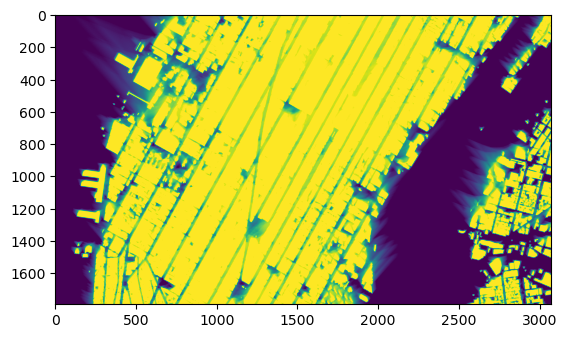

In [29]:
import cv2
import matplotlib.pyplot as plt
# arr = cv2.imread(path)
plt.imshow(arr)


In [15]:
stats


<generator object DescriptorNetwork._ at 0x000002BE44612120>